# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | fontanelas
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | igarka
Processing Record 8 of Set 1 | papao
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | meadow lakes
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | la passe
Processing Record 15 of Set 1 | nizhniy ingash
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | roma
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | pangkalanbuun
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | ad

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,-2.27,74,75,2.06,US,1732995005
1,constantia,44.1833,28.6500,6.50,76,92,9.16,RO,1732994983
2,fontanelas,38.8472,-9.4372,17.87,80,20,1.54,PT,1732995008
3,grytviken,-54.2811,-36.5092,3.21,83,44,5.23,GS,1732995009
4,anadyr,64.7500,177.4833,-0.72,86,40,14.75,RU,1732994710


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

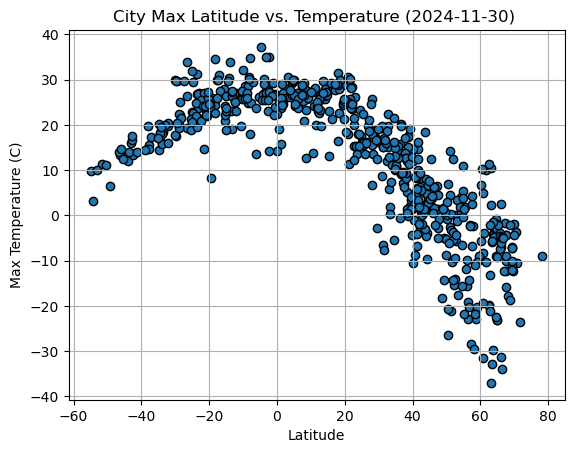

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor = "black",
    marker = "o",
    label = "City")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s) " % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

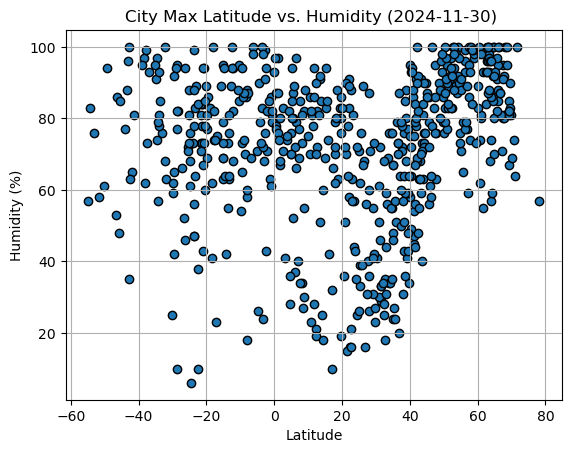

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor = "black",
    marker = "o",
    label = "City")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s) " % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

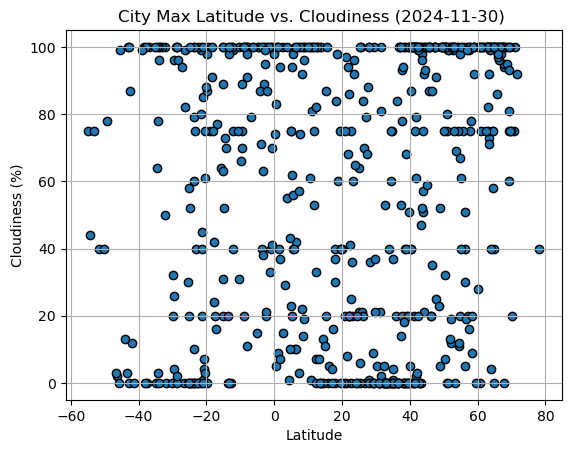

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor = "black",
    marker = "o",
    label = "City")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s) " % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

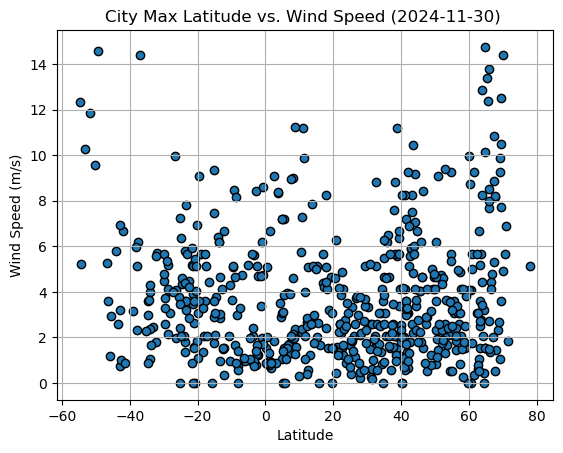

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor = "black",
    marker = "o",
    label = "City")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s) " % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linear_reg_plot(xvalues, yvalues, title, label_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regression_values = xvalues * slope + intercept
    regression_text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regression_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs. {title}")
    plt.annotate(regression_text, label_coordinates, color = "red")
    print(f"The r^2-value:{rvalue**2}")
    plt.show()
    


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,-2.27,74,75,2.06,US,1732995005
1,constantia,44.1833,28.6500,6.50,76,92,9.16,RO,1732994983
2,fontanelas,38.8472,-9.4372,17.87,80,20,1.54,PT,1732995008
4,anadyr,64.7500,177.4833,-0.72,86,40,14.75,RU,1732994710
6,igarka,67.4667,86.5833,-12.35,80,100,10.82,RU,1732995012


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,3.21,83,44,5.23,GS,1732995009
5,waitangi,-43.9535,-176.5597,12.12,77,13,5.81,NZ,1732995011
7,papao,-17.7500,-149.5500,29.82,74,24,3.61,PF,1732995013
8,bredasdorp,-34.5322,20.0403,18.14,74,64,2.99,ZA,1732995014
18,ushuaia,-54.8000,-68.3000,9.81,57,75,12.35,AR,1732994890


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value:0.7237643371924217


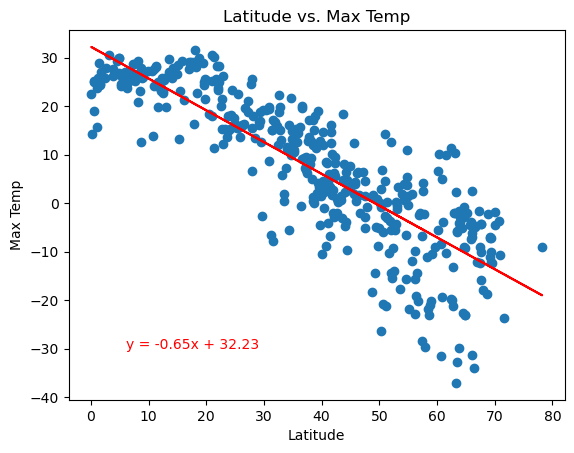

In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Max Temp"]
linear_reg_plot(xvalues, yvalues, "Max Temp", (6,-30))


The r^2-value:0.4928113169878811


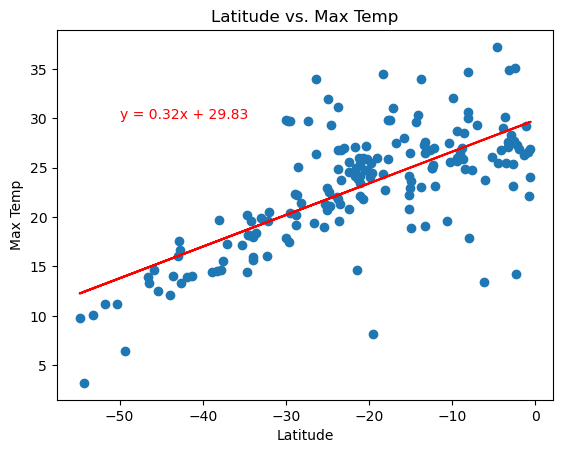

In [30]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Max Temp"]
linear_reg_plot(xvalues, yvalues, "Max Temp", (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value:0.1453305942561656


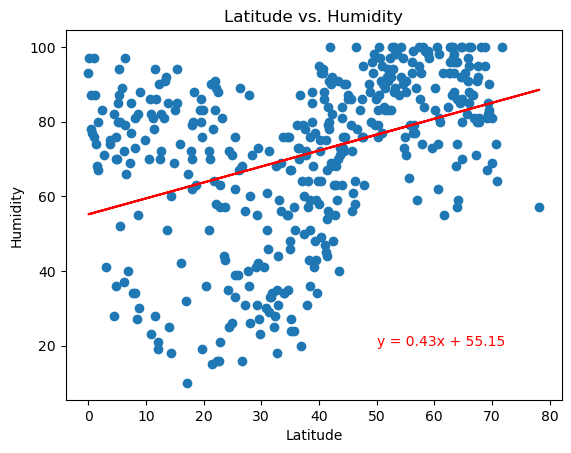

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Humidity"]
linear_reg_plot(xvalues, yvalues, "Humidity", (50,20))

The r^2-value:0.0008448410812450749


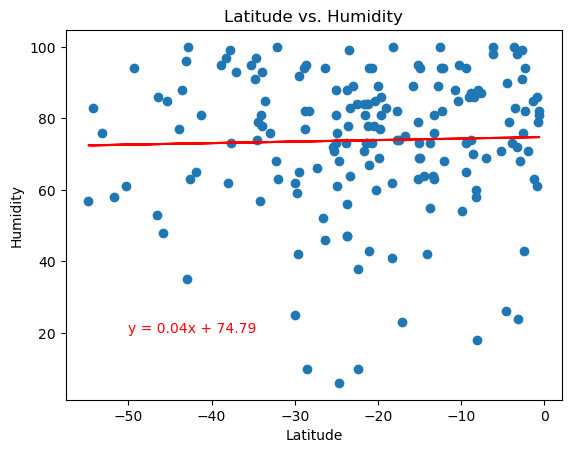

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Humidity"]
linear_reg_plot(xvalues, yvalues, "Humidity", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value:0.07307092950928605


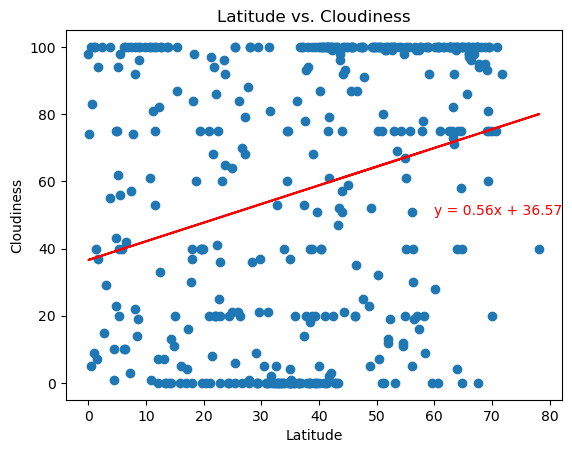

In [36]:
# Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Cloudiness"]
linear_reg_plot(xvalues, yvalues, "Cloudiness", (60,50))

The r^2-value:0.047906027026368814


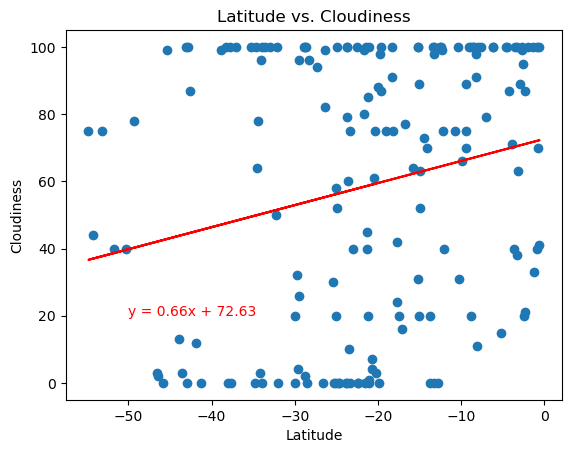

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Cloudiness"]
linear_reg_plot(xvalues, yvalues, "Cloudiness", (-50,20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value:0.0414957844656222


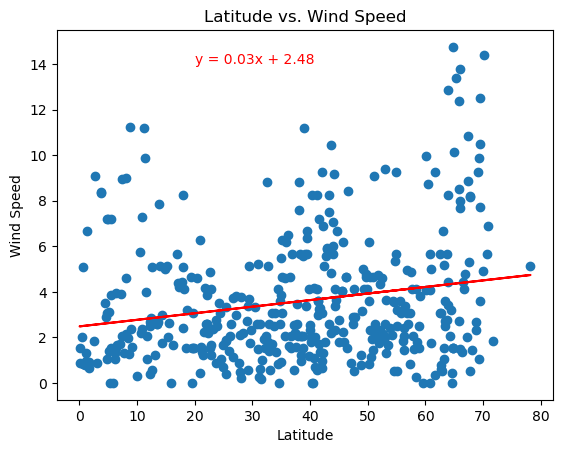

In [41]:
# Northern Hemisphere
# YOUR CODE HERE
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Wind Speed"]
linear_reg_plot(xvalues, yvalues, "Wind Speed", (20,14))

The r^2-value:0.08233751028710151


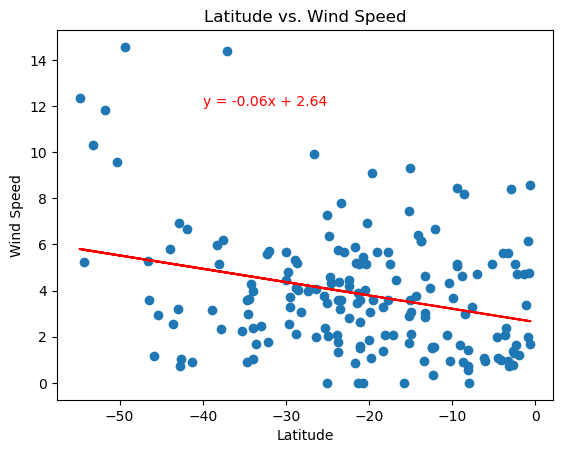

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Wind Speed"]
linear_reg_plot(xvalues, yvalues, "Wind Speed", (-40,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE